In [ ]:
from tensorflow.keras import layers, models, regularizers, initializers
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

c:\Users\HP\Desktop\industrial-anamaly-detection\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [1]:
import sys
from pathlib import Path

sys.path.append(str(Path("..") / "src"))
from data_locations import *
from utils import load_dataset


Train images: 209


In [9]:

from model import build_autoencoder

IMG_SHAPE = X_train.shape[1:]


In [ ]:

autoencoder = build_autoencoder(
    img_shape=IMG_SHAPE,
    l2_reg=1e-4
)


autoencoder.compile(
    optimizer="adam",
    loss="mse"
)
autoencoder.summary()



Model: "conv_autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_4 (UpSampling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 64, 64, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 335,747 (1.28 MB)

 Trainable params: 334,851 (1.28 MB)

 Non-trainable params: 896 (3.50 KB)

In [8]:
history = autoencoder.fit(
    X_train,
    X_train,
    epochs=25,
    batch_size=8,
    shuffle=True,
    validation_split=0.1
)


Epoch 1/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - loss: 0.1098 - val_loss: 0.3783
Epoch 2/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0858 - val_loss: 0.2455
Epoch 3/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0770 - val_loss: 0.1546
Epoch 4/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0685 - val_loss: 0.1088
Epoch 5/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.0605 - val_loss: 0.0904
Epoch 6/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - loss: 0.0533 - val_loss: 0.0790
Epoch 7/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - loss: 0.0470 - val_loss: 0.0716
Epoch 8/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - loss: 0.0414 - val_loss: 0.0676
Epoch 9/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - loss: 0.0366 - val_loss: 0.0634
Epoch 10/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - loss: 0.0325 - val_loss: 0.0608
Epoch 11/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step - loss: 0.0288 - val_loss: 0.0588
Epoch 12/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step

In [ ]:

PROJECT_ROOT = Path.cwd().parent

SRC_DIR = PROJECT_ROOT / "models"
SRC_DIR.mkdir(exist_ok=True)

MODEL_PATH = SRC_DIR / "autoencoder_bottle.keras"
autoencoder.save(MODEL_PATH)


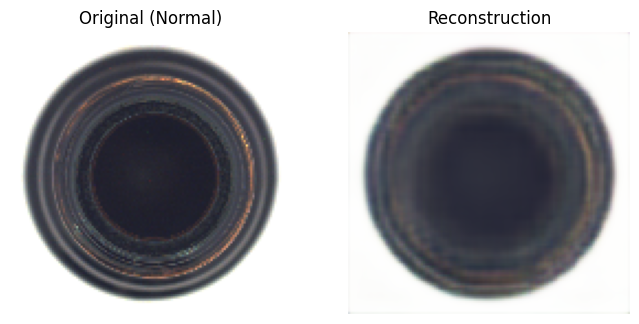

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# pick a random normal image from training set
idx = np.random.randint(0, len(X_train))

original = X_train[idx]
reconstructed = autoencoder.predict(original[None], verbose=0)[0]

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title("Original (Normal)")
plt.imshow(original)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Reconstruction")
plt.imshow(reconstructed)
plt.axis("off")

plt.show()


In [1]:
error_map = np.mean((original - reconstructed)**2, axis=-1)

plt.figure(figsize=(4,4))
plt.title("Reconstruction Error")
plt.imshow(error_map, cmap="hot")
plt.colorbar()
plt.axis("off")
plt.show()


NameError: name 'np' is not defined